In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Ans - 1

In [36]:
data_path = os.sep.join(['Ames_Housing_Sales.csv'])

data = pd.read_csv(data_path, sep=',')
data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,None,3,1Fam,None,None,0.0,0.0,...,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,None,3,1Fam,TA,No,790.0,163.0,...,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,None,4,1Fam,Gd,No,275.0,0.0,...,0.0,Pave,9,1152.0,AllPub,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,None,2,1Fam,TA,Mn,49.0,1029.0,...,0.0,Pave,5,1078.0,AllPub,366.0,1950,1996,2010,142125.0


In [37]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [38]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

## Ans - 2

In [39]:
obj_col = data.dtypes == np.object
category_cols = data.columns[obj_col]

In [40]:
num_cols = (data[category_cols].apply(lambda x: x.nunique()).sort_values(ascending=False))

small_num_cols = num_cols.loc[num_cols>1]
small_num_cols -= 1

small_num_cols.sum()

215

## Ans - 3

In [41]:
data_cpy = data.copy()

le = LabelEncoder()
ohe = OneHotEncoder()

for col in num_cols.index:
    
    dat = le.fit_transform(data_cpy[col]).astype(np.int)
    
    data_cpy = data_cpy.drop(col, axis=1)
    
    new_dat = ohe.fit_transform(dat.reshape(-1,1))
   
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    new_df = pd.DataFrame(new_dat.toarray(), index=data_cpy.index, columns=col_names)

    data_cpy = pd.concat([data_cpy, new_df], axis=1)

In [42]:
data_cpy

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LandSlope_2,GarageFinish_0,GarageFinish_1,GarageFinish_2,CentralAir_0,CentralAir_1,Street_0,Street_1,Utilities_0,Utilities_1
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [43]:
data = data.drop(num_cols.index, axis=1)

In [44]:
data.dtypes.value_counts()

float64    21
int64      16
dtype: int64

## Ans - 4 

In [45]:
y_col = 'SalePrice'

feat_cols = [x for x in data.columns if x != y_col]

X_data = data[feat_cols]
Y_data = data[y_col]

x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3,random_state=42)

In [46]:
feat_cols = [x for x in data_cpy.columns if x != y_col]

X_ohe_data = data_cpy[feat_cols]
Y_ohe_data = data_cpy[y_col]

x_ohe_train, x_ohe_test, y_ohe_train, y_ohe_test = train_test_split(X_ohe_data, Y_ohe_data, test_size=0.3, random_state=42)

In [47]:
LR = LinearRegression()

error_df = list()

LR = LR.fit(x_train, y_train)
y_train_pred = LR.predict(x_train)

y_test_pred = LR.predict(x_test)

error_df.append(pd.Series({
    'train': mean_squared_error(y_train, y_train_pred),
    'test': mean_squared_error(y_test, y_test_pred)
}, name='no enc'))

In [48]:
LR = LR.fit(x_ohe_train, y_ohe_train)
y_ohe_train_pred = LR.predict(x_ohe_train)

y_ohe_test_pred = LR.predict(x_ohe_test)

error_df.append(pd.Series({
    'train': mean_squared_error(y_ohe_train, y_ohe_train_pred),
    'test': mean_squared_error(y_ohe_test, y_ohe_test_pred)
}, name='one-hot enc'))

In [49]:
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,1.131507e+09,3.177266e+08
test,1.372182e+09,1.788918e+15


## Ans - 5

In [58]:
mms = MinMaxScaler()

skew = x_train.dtypes == np.float
skew_cols = x_train.columns[skew]

LR = LinearRegression()

errors = {
}

t_sets = {'not_enc': (x_train, x_test, y_train, y_test),
'one-hot enc': (x_ohe_train, x_ohe_test, y_ohe_train, y_ohe_test)
}

for encoding_label, (_x_train, _x_test, _y_train, _y_test) in t_sets.items():
    trainset = _x_train.copy()
    testset = _x_test.copy()

    trainset[skew_cols] = mms.fit_transform(trainset[skew_cols])
    testset[skew_cols] = mms.transform(testset[skew_cols])

    LR = LR.fit(trainset, _y_train)
    pred = LR.predict(testset)

    errors[encoding_label] = mean_squared_error(_y_test, pred)

In [59]:
errors = pd.Series(errors)
print(errors.to_string())

not_enc        1.372164e+09
one-hot enc    8.065328e+09


## Ans - 6

[Text(0.5, 0, 'Real results'),
 Text(0, 0.5, 'Predictions'),
 Text(0.5, 1.0, 'House Price Predictions using Linear Regression')]

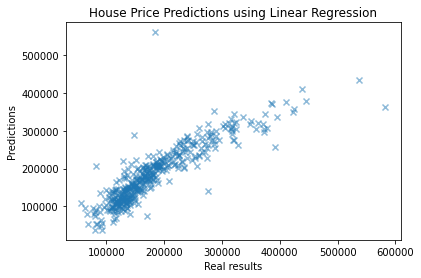

In [69]:
sp = plt.axes()

sp.scatter(y_test, y_test_pred, alpha=0.5, marker='x')

sp.set(xlabel="Real results", ylabel="Predictions", title='House Price Predictions using Linear Regression')